In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ai373 import *

Version:  0.2.12


In [3]:
board_size=(3,3)
small_square_size=(10,10)

Min and Max 0 255
Min and Max 0 255
Scaling it down....
Min and Max 0.0 1.0


Text(0.5,1,'Image Size: 235,212')

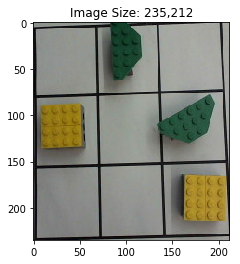

In [4]:
arr=read_image('boards/board26.jpg',s_[25:260,78:290])
imshow(arr)
title('Image Size: %d,%d' % (arr.shape[0],arr.shape[1]))

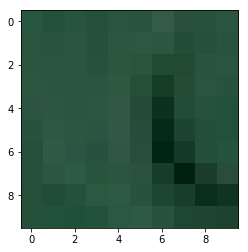

In [5]:
small_square=get_square_size(arr,
                             board_size[0],board_size[1],
                             1,2,
                            small_square_size)
imshow(small_square)

In [8]:
class_names=['white','yellow','green']

boards={}

boards['boards/board31.jpg']="""
0 2 0
0 1 0
1 0 2
"""

boards['boards/board30.jpg']="""
2 0 0
1 0 0
1 0 2
"""

boards['boards/board29.jpg']="""
2 0 0
0 1 1
0 0 2
"""

boards['boards/board28.jpg']="""
0 0 2
0 0 1
2 1 0
"""



Min and Max 0 255
Min and Max 0 255
Scaling it down....
Min and Max 0.0 1.0
 0  2  0 
 0  1  0 
 1  0  2 

Saving  training_pieces/white/piece0.png
Saving  training_pieces/green/piece1.png
Saving  training_pieces/white/piece2.png
Saving  training_pieces/white/piece3.png
Saving  training_pieces/yellow/piece4.png
Saving  training_pieces/white/piece5.png
Saving  training_pieces/yellow/piece6.png
Saving  training_pieces/white/piece7.png
Saving  training_pieces/green/piece8.png
Min and Max 0 255
Min and Max 0 255
Scaling it down....
Min and Max 0.0 1.0
 2  0  0 
 1  0  0 
 1  0  2 

Saving  training_pieces/green/piece9.png
Saving  training_pieces/white/piece10.png
Saving  training_pieces/white/piece11.png
Saving  training_pieces/yellow/piece12.png
Saving  training_pieces/white/piece13.png
Saving  training_pieces/white/piece14.png
Saving  training_pieces/yellow/piece15.png
Saving  training_pieces/white/piece16.png
Saving  training_pieces/green/piece17.png
Min and Max 0 255
Min and Max 0 255


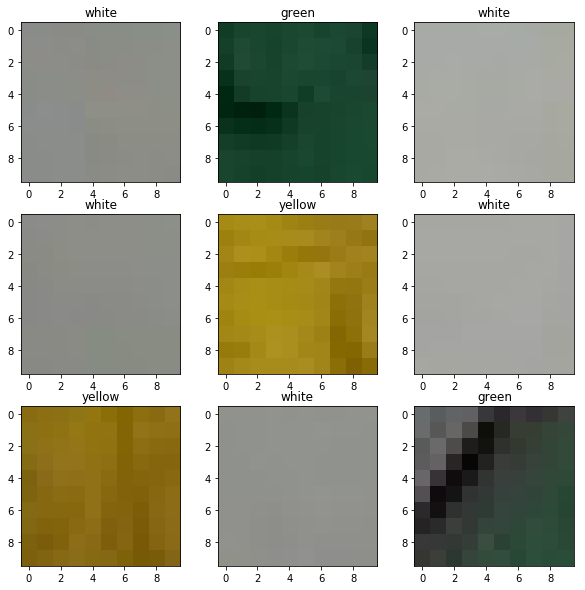

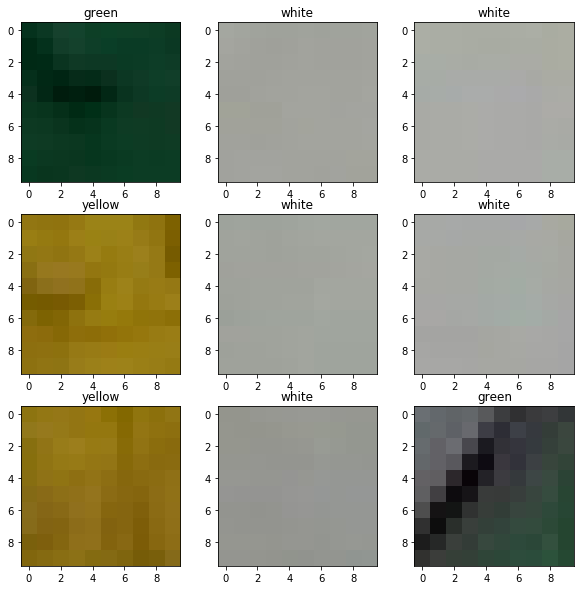

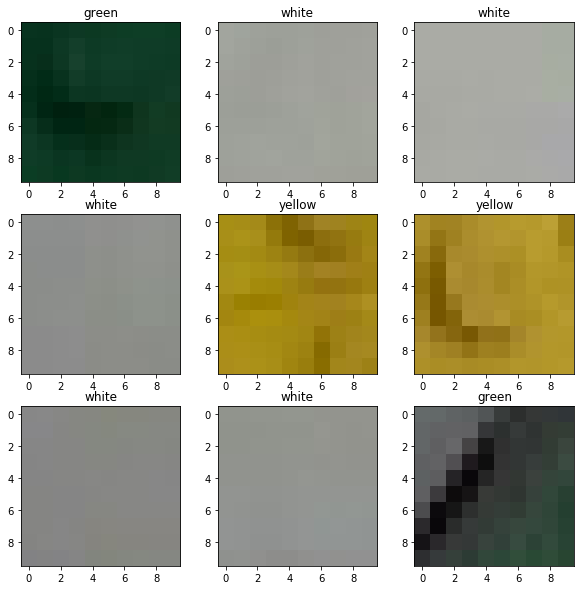

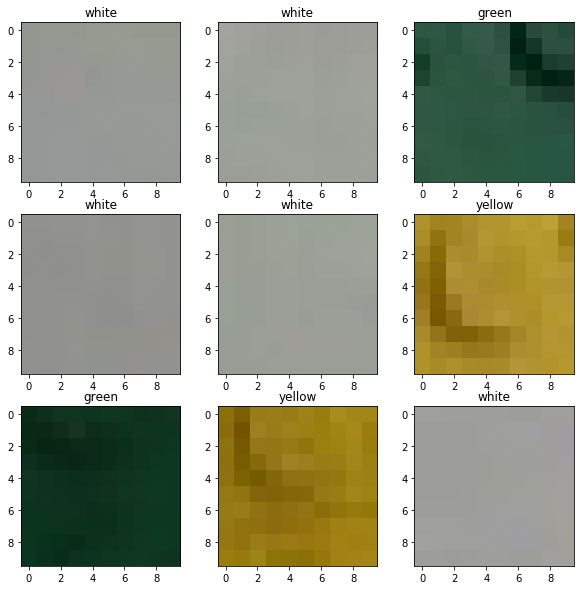

In [9]:
if not os.path.exists('training_pieces'):
    os.mkdir('training_pieces')
    
for name in class_names:
    dirname='training_pieces/%s' % name
    if not os.path.exists(dirname):
        print("Making ",dirname)
        os.mkdir(dirname)
    

filenames={}
for name in class_names:
    filenames[name]=[]

count=0
for image_filename in boards:
    board=boards[image_filename]
    arr=read_image(image_filename,s_[25:260,78:290])
    
    state=Board(board_size[0],board_size[1])
    state.board=[int(_) for _ in board.split()]    

    print(state)
    
    nr,nc=state.shape
    
    figure(figsize=(10,10))
    for r in range(nr):
        for c in range(nc):
            subplot(nr,nc,count%(nc*nr)+1)
            square=get_square_size(arr,board_size[0],board_size[1],r,c,small_square_size)
            imshow(square)
            name=class_names[state[r,c]]
            title(name)
            dirname='training_pieces/%s' % name
            fname='%s/piece%d.png' % (dirname,count)
            print("Saving ",fname)
            imwrite(fname,(square*255).astype(uint8))
            count+=1    
            filenames[name].append(fname)
            
# for name in class_names:
#     gnames=glob('training_pieces/%s/*.*' % name)
#     gnames=[_ for _ in gnames if 'desktop.ini' not in _.lower()]
#     fnames=filenames[name]
#     for fname in fnames:
#         gnames.remove(fname)
        
#     if gnames:
#         raise ValueError("Warning: Extra files in the folder.  Consider deleting the folder and rerunning.",gnames)
